In [2]:
from IPython.display import display, Image
from pprint import pprint
import heapq 

from janet import *
sympy.init_printing()

In [6]:
class Q(list):
    def __init__(self, *args):
        assert len(args) <= 1
        super().__init__(*args)
        heapq.heapify(self)
        
    def push(self, w):
        if isinstance(w, Wrap):
            heapq.heappush(self, w)
        else:
            for i in w:
                assert isinstance(i, Wrap)
                heapq.heappush(self, i)
        
    def pop(self):
        return heapq.heappop(self)
    
    def reduce(self, j):
        d, r = 0, []
        while self and (not r or self[0].degree() == d):
            w = self.pop()
            w.poly.NFhead(j)
            if w.poly:
                w.update()
                w.poly.pp()
                if not r:
                    d = w.degree()
                elif d > w.degree():
                    for i in r:
                        self.push(i)
                    d, r = w.lm.degree(), []
                r.append(w)
        for i in r:
            i.poly.NFtail(j)
            i.poly.pp()
        return r
    
    def autoReduce(self, q):
        assert q
        def get_min(l):
            i = 0
            for j in range(1, len(l)):
                if l[i] > l[j]:
                    i = j
            w = l[i]
            del l[i]
            return w

        d, r = q[0].degree(), []
        while q:
            w = get_min(q)
            l = []
            for v in q:
                v.poly.reduce(w.poly)
                if v.poly:
                    v.update()
                    d = min(d, v.degree())
                    l.append(v)
            q = l
            r.append(w)
        res = []
        for w in r:
            if w.degree() != d:
                self.push(w)
            else:
                w.poly.pp()
                res.append(w)
            
        return res

In [4]:
Monom.cmp = Monom.POTdeglex

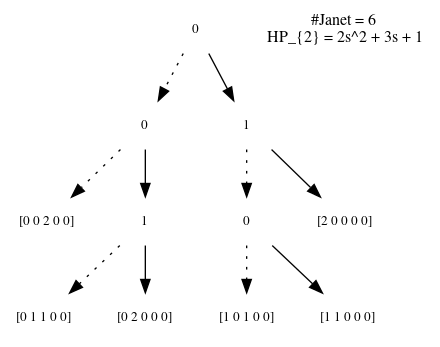

In [4]:
var = ['a', 'b', 'c', 'd', 'e']
fun = []
Monom.init(var, fun)
for i, g in enumerate(var):
    globals()[g] = Poly(Monom(i))

pommaret = Janet()
q = pommaret.insert(Wrap(p) for p in (\
a**2 - b*e, a*b - c*e, b**2 - d*e,\
a*c - d*e, b*c - a*d, c**2 - d*b))
assert q == []
pommaret.saveImage('pommaret.png')
Image('./pommaret.png')

In [5]:
assert pommaret.degMinProlong() == 2
q = Q(pommaret.prolong(2))
print(len(q))
assert q.reduce(pommaret) == []

8


In [6]:
Janet.reduction

In [7]:
def prnlm(r):
    for w in r:
        print(f"{w.poly}", end="\n")
    print()

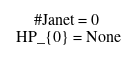

In [8]:
var = ['x1', 'x2', 'x3', 'x4']
fun = []
Monom.init(var, fun)
for i, g in enumerate(var):
    globals()[g] = Poly(Monom(i))
cyclic4 = Janet()
q = Q(Wrap(p) for p in (
x1+x2+x3+x4,\
x1*x2+x2*x3+x3*x4+x4*x1,\
x1*x2*x3+x2*x3*x4+x3*x4*x1+x4*x1*x2,\
x1*x2*x3*x4-1))
# assert q == []
cyclic4.saveImage('cyclic4.png', level=3)
Image('./cyclic4.png')

x1
x2**2
x2*x3**2
x2*x3*x4**2
x3**3*x4**2
x2*x4**4
x3**2*x4**4


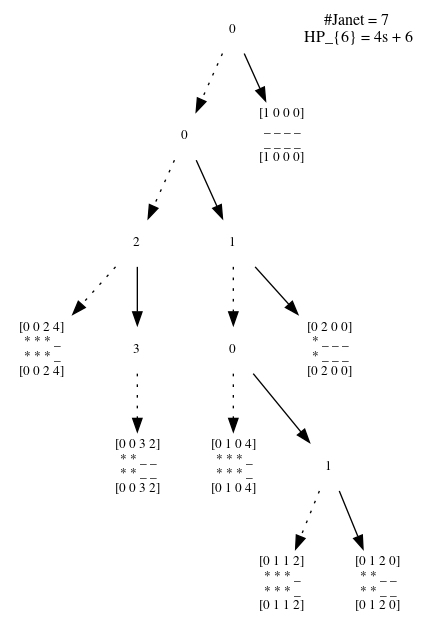

In [9]:
while q:
    w = q.pop()
    w.poly.NFhead(cyclic4)
    if w.poly:
        w.update()
        w.poly.NFtail(cyclic4)
        w.poly.pp()
        print(f"{w.lm}")
        q.push(cyclic4.insert([w]))
    q.push(cyclic4.prolong())
#     break
cyclic4.saveImage('cyclic4.png', level=3)
Image('./cyclic4.png')

prolong 0, Q 0


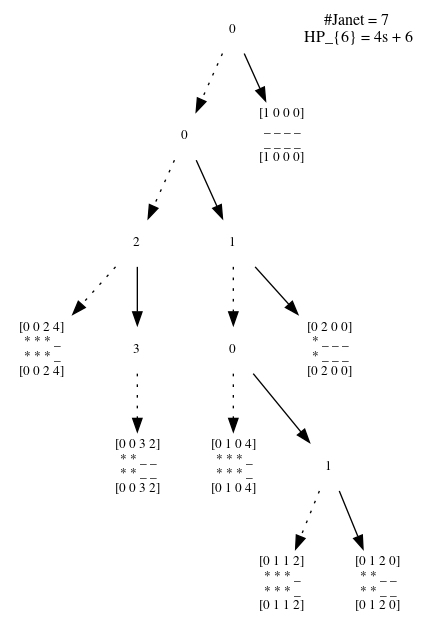

In [10]:
while True:
    j = q[0].degree() if q else 0
    i = cyclic4.degMinProlong()
    print(f"prolong {i}, Q {j}")
    if i == 0 and j == 0:
        break
    if j == 0 or 0 < i < j:
        q.push(cyclic4.prolong(i))
    res = q.reduce(cyclic4)
    print("res1 - ", end="")
    prnlm(res)
    if res:
        res = q.autoReduce(res)
        q.push(cyclic4.insert(res))
cyclic4.saveImage('cyclic4.png', level=3)
Image('./cyclic4.png')

In [11]:
var = ['x1', 'x2', 'x3', 'x4', 'x5']
fun = []
Monom.init(var, fun)
for i, g in enumerate(var):
    globals()[g] = Poly(Monom(i))
cyclic5 = Janet()
q = Q(Wrap(p) for p in (
x1+x2+x3+x4+x5,
x1*x2+x1*x5+x2*x3+x3*x4+x4*x5,
x1*x2*x3+x1*x2*x5+x1*x4*x5+x2*x3*x4+x3*x4*x5,
x1*x2*x3*x4+x1*x2*x3*x5+x1*x2*x4*x5+x1*x3*x4*x5+x2*x3*x4*x5,
x1*x2*x3*x4*x5-1))

prolong 0, Q 1
x1, 
prolong 0, Q 2
x2**2, 
prolong 2, Q 3
x2*x3**2, 
prolong 3, Q 4
x2*x3*x4**2, x3**3*x4, 
prolong 4, Q 5
x2*x3*x4*x5**2, x3**2*x4**2*x5, x3**2*x4**3, 
prolong 5, Q 0
x2*x4**3*x5**2, x3*x4**3*x5**2, x3**3*x5**3, x3*x4**4*x5, x3**4*x5**2, x2*x4**4*x5, 
prolong 4, Q 0
x3**4*x4, 
prolong 5, Q 0
prolong 6, Q 0
x2*x4**2*x5**4, x4**4*x5**3, x3*x4**2*x5**4, x4**3*x5**4, x2*x3*x5**5, x4**5*x5**2, 
prolong 7, Q 0
x3**3, 
prolong 3, Q 4
x2*x4**3, x3**2*x4**2, 
prolong 4, Q 5
x3*x4**3*x5, x3*x4**4, x4**5, x4**4*x5, 
prolong 5, Q 6
x2*x5**5, x2*x4**2*x5**3, x3*x4**2*x5**3, 
prolong 6, Q 7
x2*x4*x5**5, x3*x4*x5**5, x3**2*x5**5, 
prolong 7, Q 8
x4**2*x5**6, x3*x5**7, x4*x5**7, x5**8, x3**2*x4*x5**5, 
prolong 8, Q 0
x3*x4**3, 
prolong 4, Q 5
x4**4, 
prolong 4, Q 5
prolong 0, Q 0


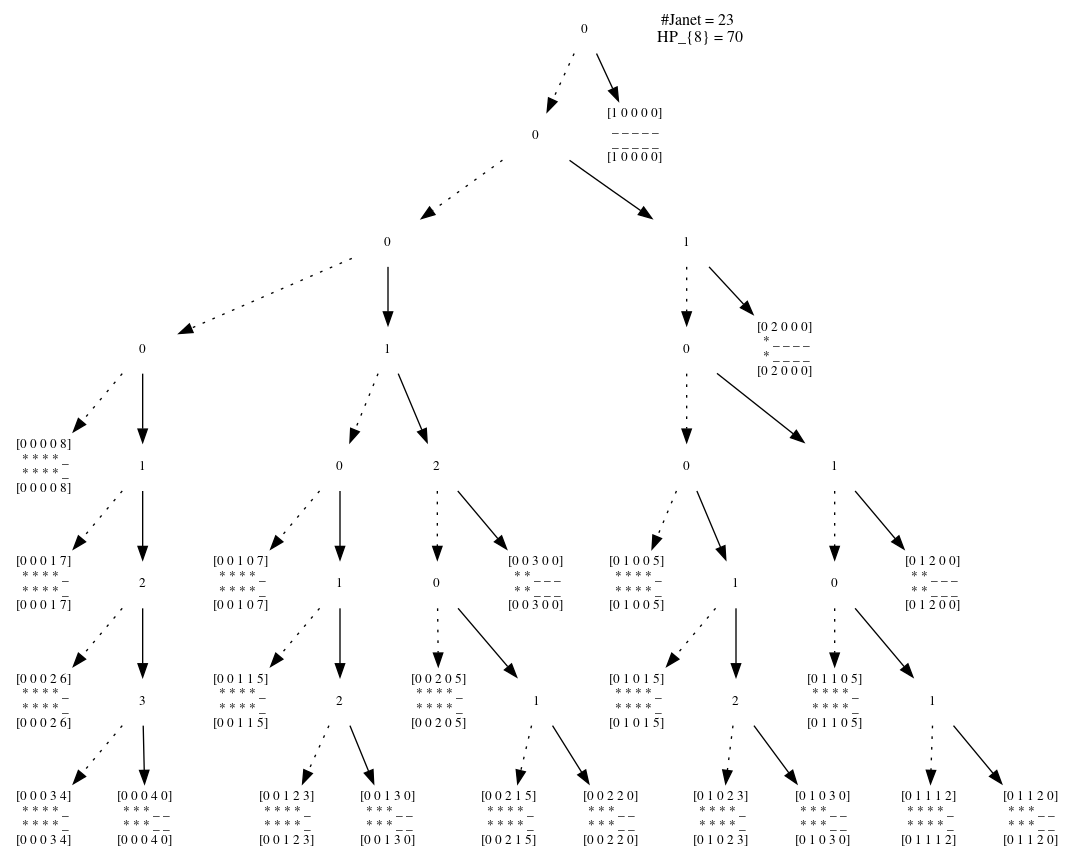

In [12]:
def prnlm(r):
    for w in r:
        print(f"{w.lm}", end=", ")
    print()
    
while True:
    j = q[0].degree() if q else 0
    i = cyclic5.degMinProlong()
    print(f"prolong {i}, Q {j}")
    if i == 0 and j == 0:
        break
    if j == 0 or 0 < i < j:
        q.push(cyclic5.prolong(i))
    res = q.reduce(cyclic5)
    if res:
        res = q.autoReduce(res)
        prnlm(res)
        q.push(cyclic5.insert(res))
cyclic5.saveImage('cyclic5.png', level=3)
Image('./cyclic5.png')

In [13]:
var = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']
fun = []
Monom.init(var, fun)
for i, g in enumerate(var):
    globals()[g] = Poly(Monom(i))
cyclic6 = Janet()
q = Q(Wrap(p) for p in (
x1+x2+x3+x4+x5+x6,
x1*x2+x1*x6+x2*x3+x3*x4+x4*x5+x5*x6,
x1*x2*x3+x1*x2*x6+x1*x5*x6+x2*x3*x4+x3*x4*x5+x4*x5*x6,
x1*x2*x3*x4+x1*x2*x3*x6+x1*x2*x5*x6+x1*x4*x5*x6+x2*x3*x4*x5+x3*x4*x5*x6,
x1*x2*x3*x4*x5+x1*x2*x3*x4*x6+x1*x2*x3*x5*x6+x1*x2*x4*x5*x6+x1*x3*x4*x5*x6+x2*x3*x4*x5*x6,
x1*x2*x3*x4*x5*x6-1))

prolong 0, Q 1
x1, 
prolong 0, Q 2
x2**2, 
prolong 2, Q 3
x2*x3**2, 
prolong 3, Q 4
x2*x3*x4**2, x3**3*x4, 
prolong 4, Q 5
x2*x3*x4*x5**2, x3**2*x4**2*x5, x3**2*x4**3, 
prolong 5, Q 6
x2*x3*x4*x5*x6**2, x3*x4**3*x5*x6, x3*x4**2*x5**3, x3*x4**3*x5**2, x3**2*x4*x5**2*x6, x3*x4**2*x5**2*x6, x3*x4**4*x5, 
prolong 6, Q 0
x3**2*x4**2*x6**3, x2*x4**2*x5**2*x6**2, x2*x4*x5**3*x6**2, x4**3*x5**2*x6**2, x3*x4*x5**4*x6, x4**3*x5**3*x6, x2*x4**2*x5**3*x6, x2*x4*x5**4*x6, x4**2*x5**4*x6, x3*x4**4*x6**2, x3**4*x5*x6**2, x3**3*x5**2*x6**2, x4**4*x5**2*x6, x2*x4**3*x5**2*x6, 
prolong 4, Q 0
x3**4*x4, 
prolong 5, Q 0
prolong 7, Q 0
x3*x4*x5**3*x6**3, x3*x4**3*x6**4, x4**2*x5**3*x6**3, x2*x3*x5**3*x6**3, x4*x5**4*x6**3, x3**2*x5**3*x6**3, x2*x5**4*x6**3, x3**3*x5*x6**4, x3**2*x4*x5*x6**4, x2*x4**3*x5*x6**3, x2*x4**2*x5*x6**4, x3*x4**2*x5*x6**4, x2*x3*x5**4*x6**2, x3**2*x5**4*x6**2, 
prolong 8, Q 0
x3**2*x4, x2*x3*x4, x3**3, x2*x4**2, 
prolong 3, Q 4
x3*x4**2*x5, x3*x4**3, x4**3*x5, x2*x3*x5**2, x3**2*x5

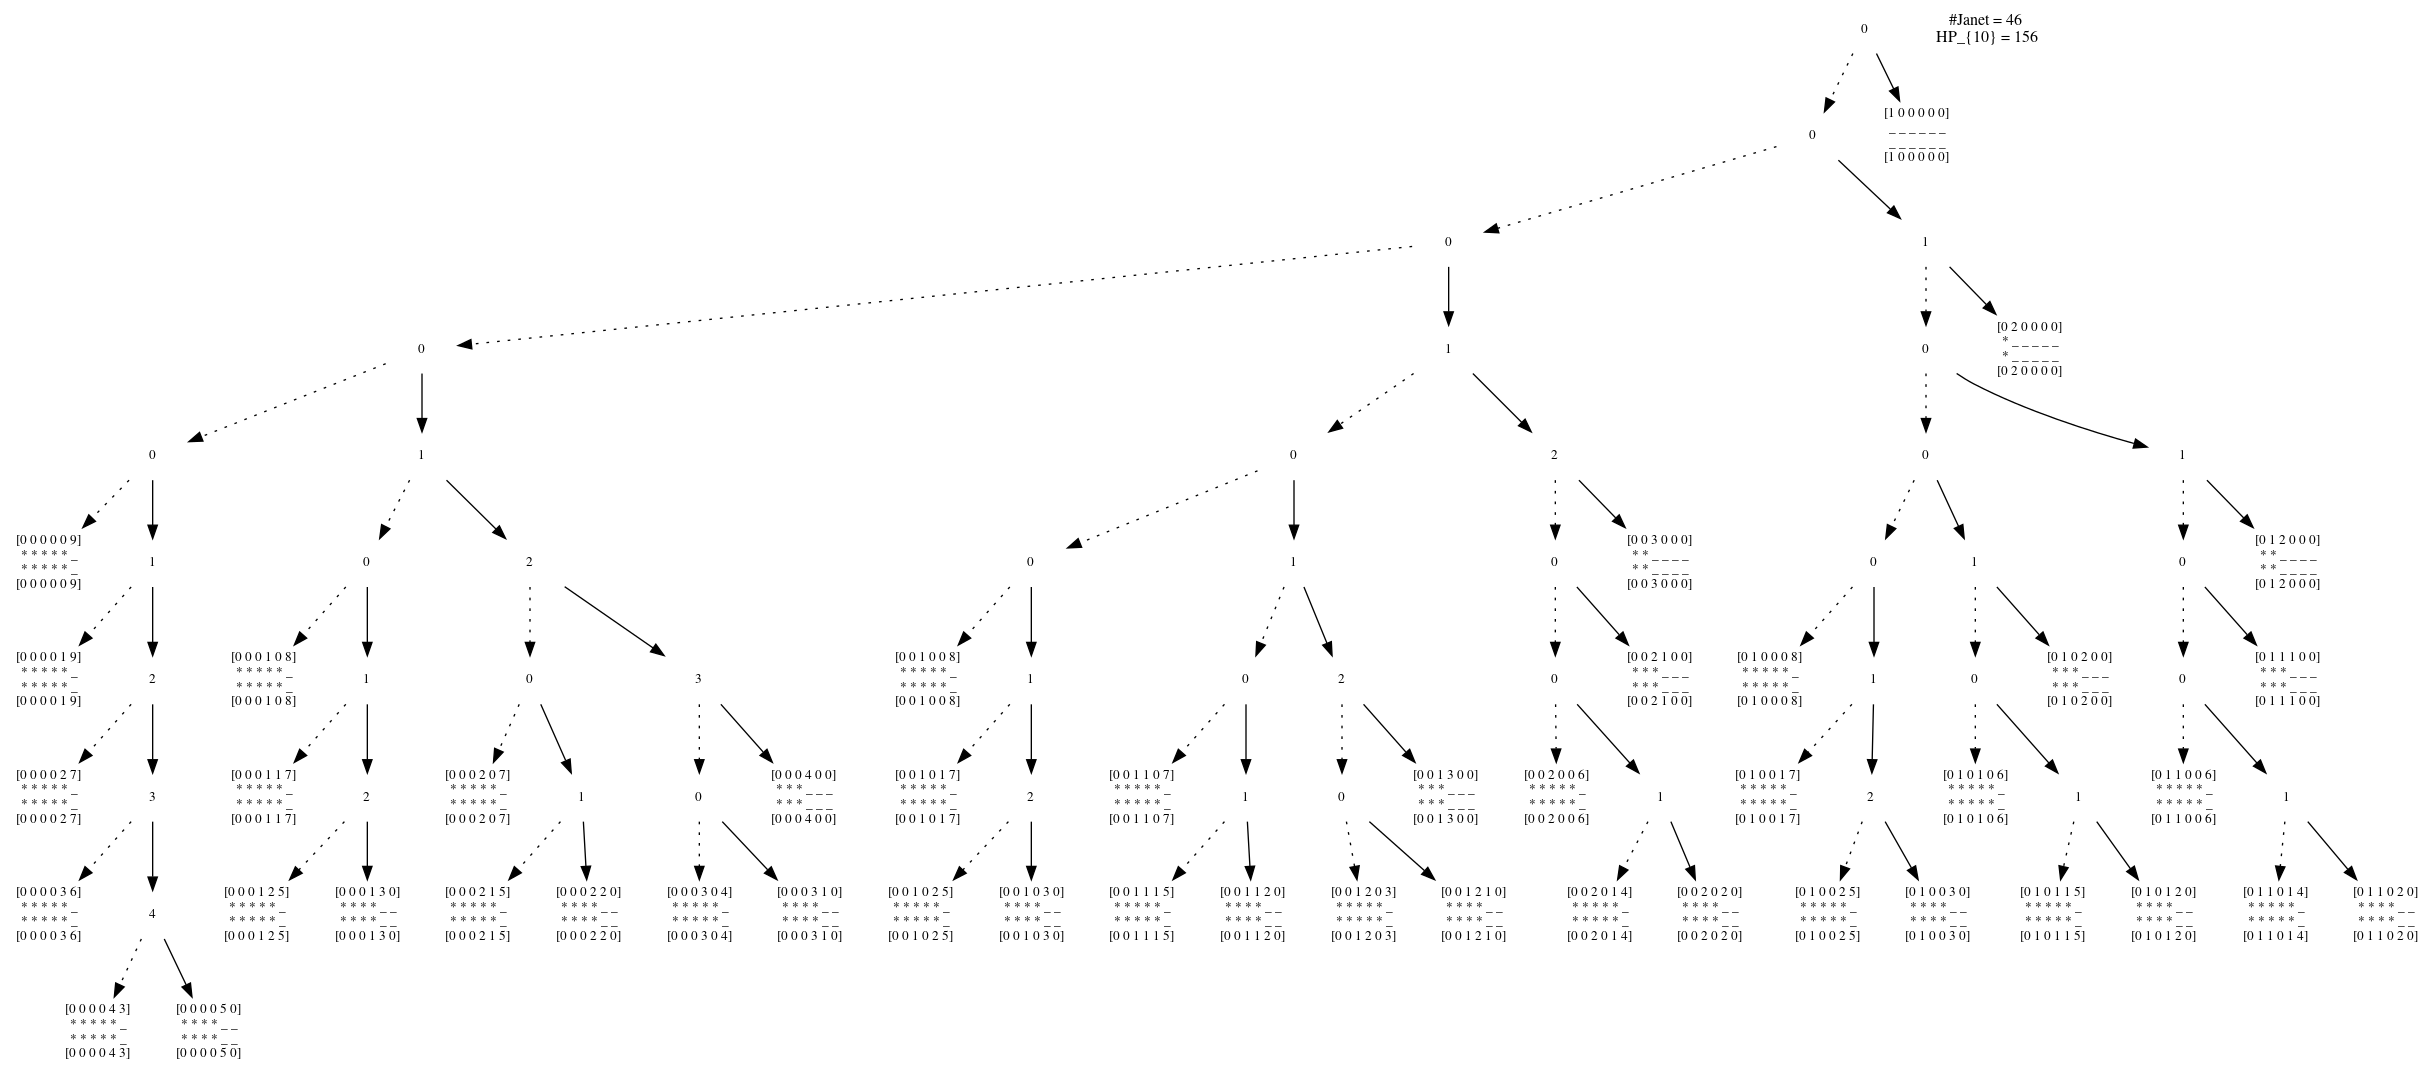

In [14]:
while True:
    j = q[0].degree() if q else 0
    i = cyclic6.degMinProlong()
    print(f"prolong {i}, Q {j}")
    if i == 0 and j == 0:
        break
    if j == 0 or 0 < i < j:
        q.push(cyclic6.prolong(i))
    res = q.reduce(cyclic6)
    if res:
        res = q.autoReduce(res)
        prnlm(res)
        q.push(cyclic6.insert(res))
cyclic6.saveImage('cyclic6.png', level=3)
cyclic6.saveImage('cyclic6.pdf', level=3)
Image('./cyclic6.png')

In [15]:
p = x1*x2*x3*x4*x5*x6-1
p.NFhead(cyclic6)
p

[]

In [7]:
var = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']
fun = []
Monom.init(var, fun)
for i, g in enumerate(var):
    globals()[g] = Poly(Monom(i))
cyclic7 = Janet()
q = Q(Wrap(p) for p in (
x1+x2+x3+x4+x5+x6+x7,
x1*x2+x1*x7+x2*x3+x3*x4+x4*x5+x5*x6+x6*x7,
x1*x2*x3+x1*x2*x7+x1*x6*x7+x2*x3*x4+x3*x4*x5+x4*x5*x6+x5*x6*x7,
x1*x2*x3*x4+x1*x2*x3*x7+x1*x2*x6*x7+x1*x5*x6*x7+x2*x3*x4*x5+x3*x4*x5*x6+x4*x5*x6*x7,
x1*x2*x3*x4*x5+x1*x2*x3*x4*x7+x1*x2*x3*x6*x7+x1*x2*x5*x6*x7+x1*x4*x5*x6*x7+x2*x3*x4*x5*x6+x3*x4*x5*x6*x7,
x1*x2*x3*x4*x5*x6+x1*x2*x3*x4*x5*x7+x1*x2*x3*x4*x6*x7+x1*x2*x3*x5*x6*x7+x1*x2*x4*x5*x6*x7+x1*x3*x4*x5*x6*x7+x2*x3*x4*x5*x6*x7,
x1*x2*x3*x4*x5*x6*x7-1))

In [9]:
def prnlm(r):
    for w in r:
        print(f"{w.lm}", end=", ")
    print()

In [ ]:
while True:
    j = q[0].degree() if q else 0
    i = cyclic7.degMinProlong()
    print(f"prolong {i}, Q {j}")
    if i == 0 and j == 0:
        break
    if j == 0 or 0 < i < j:
        q.push(cyclic7.prolong(i))
    res = q.reduce(cyclic7)
    if res:
        res = q.autoReduce(res)
        prnlm(res)
        q.push(cyclic7.insert(res))
cyclic7.saveImage('cyclic7.png', level=3)
cyclic7.saveImage('cyclic7.pdf', level=3)
Image('./cyclic7.png')

prolong 0, Q 2
x1*x2, 
prolong 0, Q 3
x2*x3**2, 
prolong 3, Q 4
x2*x3*x4**2, x1*x3**2*x4, 
prolong 4, Q 5
x2*x3*x4*x5**2, x1*x3*x4**2*x5, x3**2*x4**3, 
prolong 5, Q 6
x2*x3*x4*x5*x6**2, x1*x3*x4*x5**2*x6, x1*x4**2*x5**2*x6, x3*x4**3*x5*x6, x3*x4**2*x5**3, x3**2*x4**2*x5**2, 
prolong 6, Q 7
x1*x3*x4*x5*x6*x7**2, x1**2*x3*x4*x5*x6*x7, x3*x4*x5**2*x6**3, x2**2*x3*x5**2*x6*x7, x3*x4*x5**3*x6**2, x3*x4**2*x5**2*x6**2, x3**2*x4**2*x5*x6**2, x2*x4**2*x5**3*x6, x3**2*x4*x5**3*x6, x3*x4*x5**4*x6, x1*x3**2*x5**2*x6**2, x2**2*x4**2*x5**2*x6, x3*x4**3*x5**3, 
prolong 2, Q 0
x1**2*x2, 
prolong 3, Q 0
x2**2*x3**2, 
prolong 4, Q 0
x2**2*x3*x4**2, x1**2*x3**2*x4, 
prolong 5, Q 0
x2**2*x3*x4*x5**2, x1**2*x3*x4**2*x5, 
prolong 6, Q 0
x2**2*x3*x4*x5*x6**2, x3*x4**3*x5**2*x6, x1**2*x4**2*x5**2*x6, x1**2*x3*x4*x5**2*x6, 
prolong 7, Q 0
x1**2*x4*x5*x6**2*x7**2, x3*x4**2*x5**2*x6*x7**2, x2*x4**2*x5**2*x6*x7**2, x3**2*x4**2*x5*x6*x7**2, x2**2*x3*x4*x5*x6*x7**2, x4**2*x5**3*x6**2*x7, x1*x4*x5**3*x6**2*x7, x2*x